# Exploratory Data Analysis (EDA):


Through EDA, we aim to uncover actionable insights and patterns within the dataset that can inform decision-making for various stakeholders, including Airbnb hosts, guests, and policymakers. By understanding the dynamics of the Airbnb market in Cape Town, we can identify opportunities for optimization, improvement, and innovation within the Airbnb ecosystem.

In [21]:
# pip install dash plotly

In [22]:
import numpy as np     
import pandas as pd      
import matplotlib.pyplot as plt   
import seaborn as sns 
import re

# Statistical analysis
import scipy.stats as stats

# Jupyter Notebook magic commands for inline plotting
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [23]:
df = pd.read_csv('data/clean/clean_listings.csv')

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21570 entries, 0 to 21569
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   host_name                       21570 non-null  object 
 1   neighbourhood                   21570 non-null  object 
 2   latitude                        21570 non-null  float64
 3   longitude                       21570 non-null  float64
 4   room_type                       21570 non-null  object 
 5   price                           21570 non-null  float64
 6   minimum_nights                  21570 non-null  int64  
 7   number_of_reviews               21570 non-null  int64  
 8   last_review                     16260 non-null  object 
 9   reviews_per_month               16260 non-null  float64
 10  calculated_host_listings_count  21570 non-null  int64  
 11  availability_365                21570 non-null  int64  
 12  number_of_reviews_ltm           

In [26]:
df.describe()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,rating
count,21570.000000,21570.000000,21570.000000,21570.000000,21570.000000,16260.000000,21570.000000,21570.000000,21570.000000,12927.000000
mean,-33.957945,18.473844,4061.920399,3.430830,22.531247,0.931870,11.639638,199.584886,6.466110,4.772162
std,0.100604,0.126888,8699.799993,4.379783,44.182936,1.077782,24.790034,127.126920,11.047883,0.273646
min,-34.262840,18.320145,160.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000,1.670000
25%,-34.019835,18.400963,1050.000000,1.000000,1.000000,0.190000,1.000000,78.000000,0.000000,4.670000
50%,-33.928754,18.427510,2000.000000,2.000000,5.000000,0.570000,2.000000,239.000000,2.000000,4.850000
75%,-33.910040,18.482737,3815.500000,3.000000,24.000000,1.260000,7.000000,314.000000,8.000000,4.960000
max,-33.572180,18.936030,255000.000000,30.000000,724.000000,16.650000,151.000000,365.000000,216.000000,5.000000


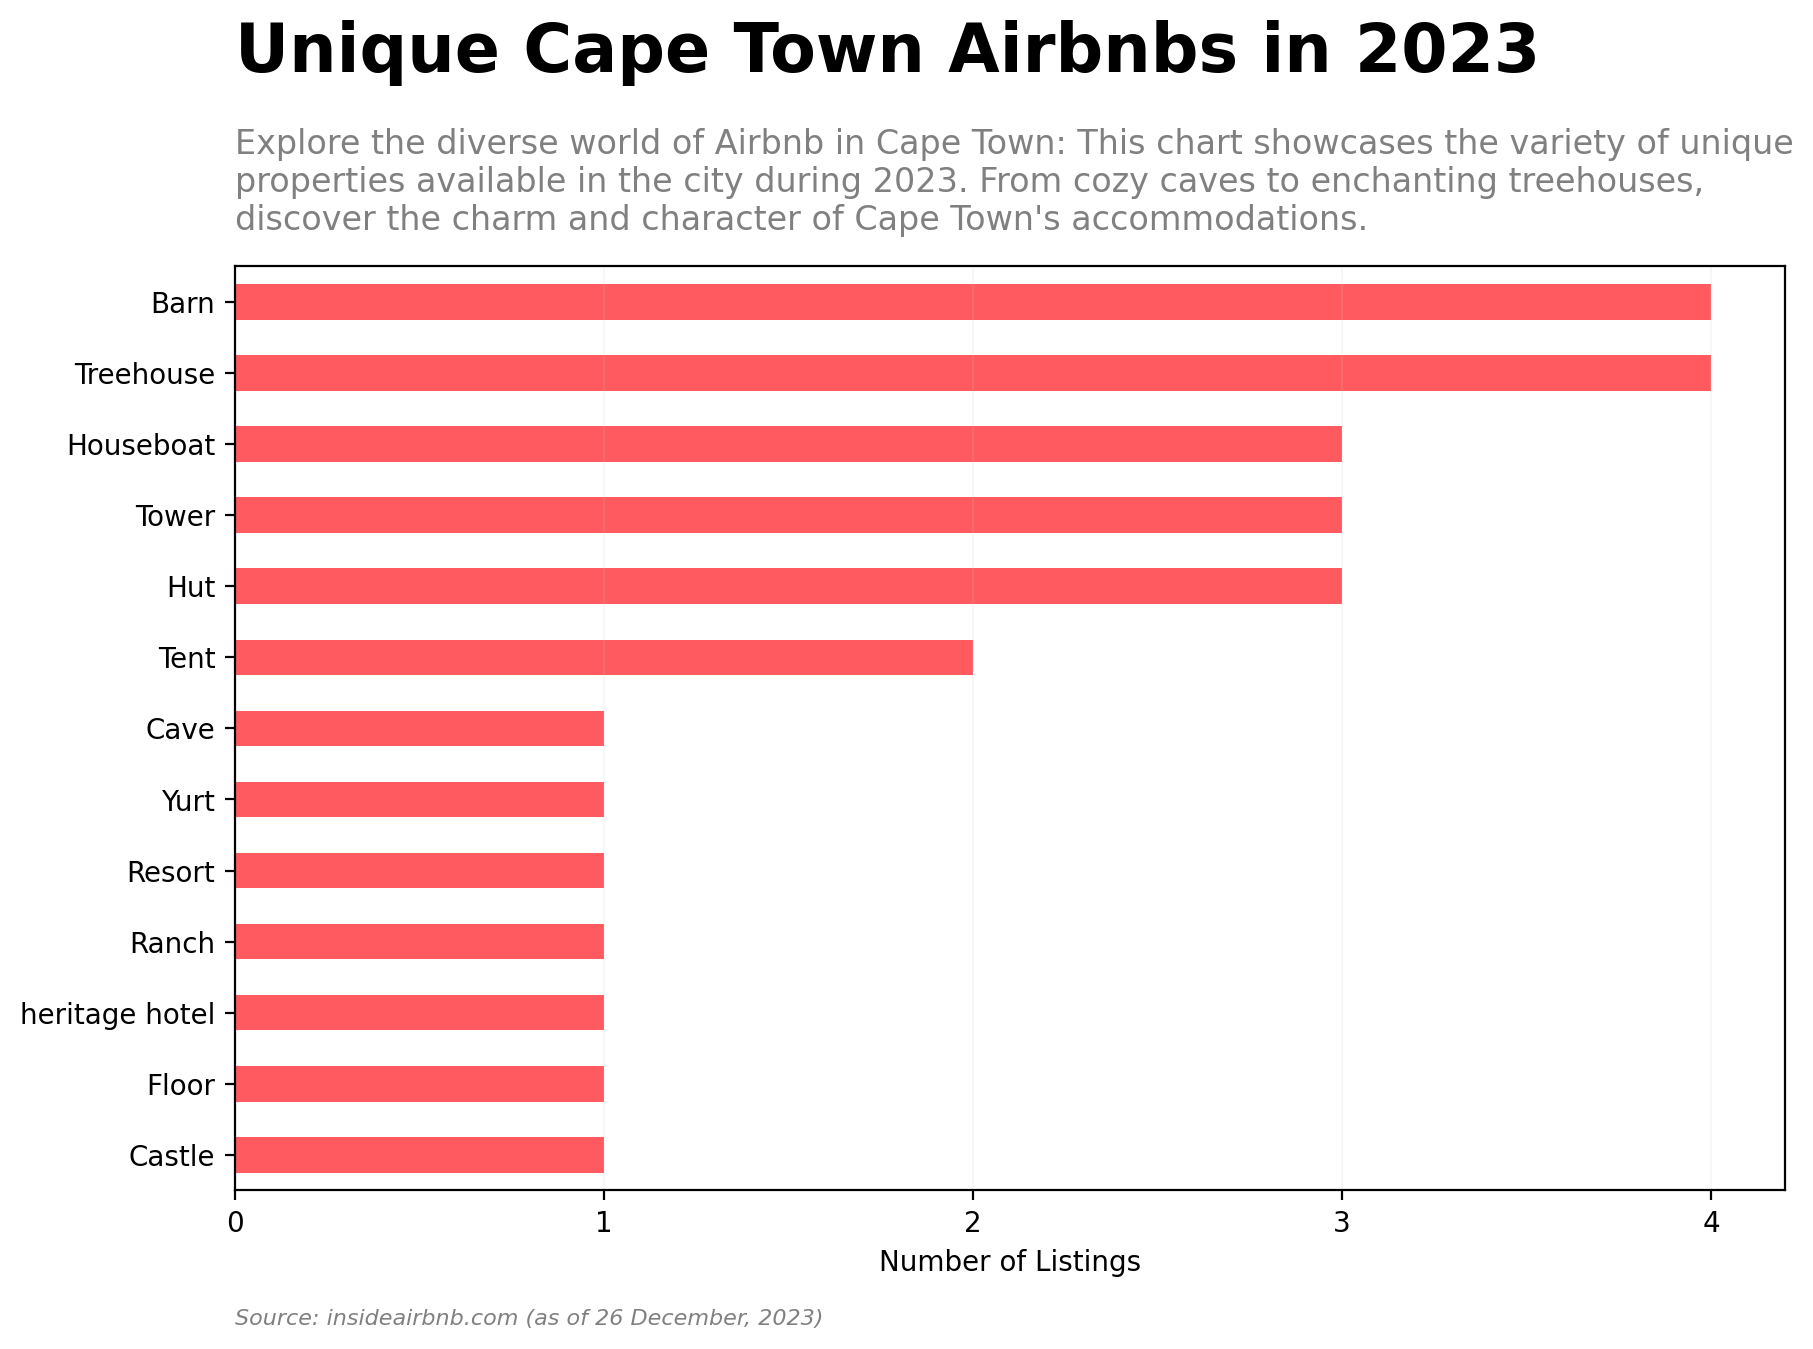

In [27]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 6))  # Set figure size here

# Define colors
airbnb_color = '#FF5A5F'
gray_color = '#cccccc'

# Property type distribution across different neighborhoods
property_type_counts = df['property_type'].value_counts()[-13:].sort_values(ascending=True)

# Plot the bar chart
property_type_counts.plot(kind='barh', color=airbnb_color) 
# property_type_counts.plot(kind='barh', color=[custom_colors.get(prop, gray_color) for prop in property_type_counts.index]) 

# Add description
description = "Explore the diverse world of Airbnb in Cape Town: This chart showcases the variety of unique\nproperties available in the city during 2023. From cozy caves to enchanting treehouses,\ndiscover the charm and character of Cape Town's accommodations."
ax.text(0, 1.15, description, fontsize=12, ha='left', va='top', transform=ax.transAxes, color='gray')  # Adjust text position and properties

# Set title
ax.set_title("Unique Cape Town Airbnbs in 2023", fontsize=24, fontweight='bold', loc='left', pad=70)  # Use ax.set_title() to set title

ax.set_xlabel('Number of Listings')  # Use ax.set_xlabel() to set x-label
ax.set_ylabel('', labelpad=20)  # Use ax.set_ylabel() to set y-label

ax.set_xticks(range(0, int(property_type_counts.max()) + 1))  # Use ax.set_xticks() to set x-ticks
ax.grid(axis='x', which='major', linestyle='-', color=gray_color, linewidth=0.1)  # Set grid color and properties

ax.text(0, -0.15, "Source: insideairbnb.com (as of 26 December, 2023)", style='italic', ha='left', va='bottom', transform=ax.transAxes, fontsize=8, color='gray')  # Adjust text position and properties

# Save the plot as an image file
plt.savefig('unique_airbnbs_cape_town_2023.png', dpi=300, bbox_inches='tight')  # Add bbox_inches='tight' to ensure the saved image doesn't cut off labels

plt.show()


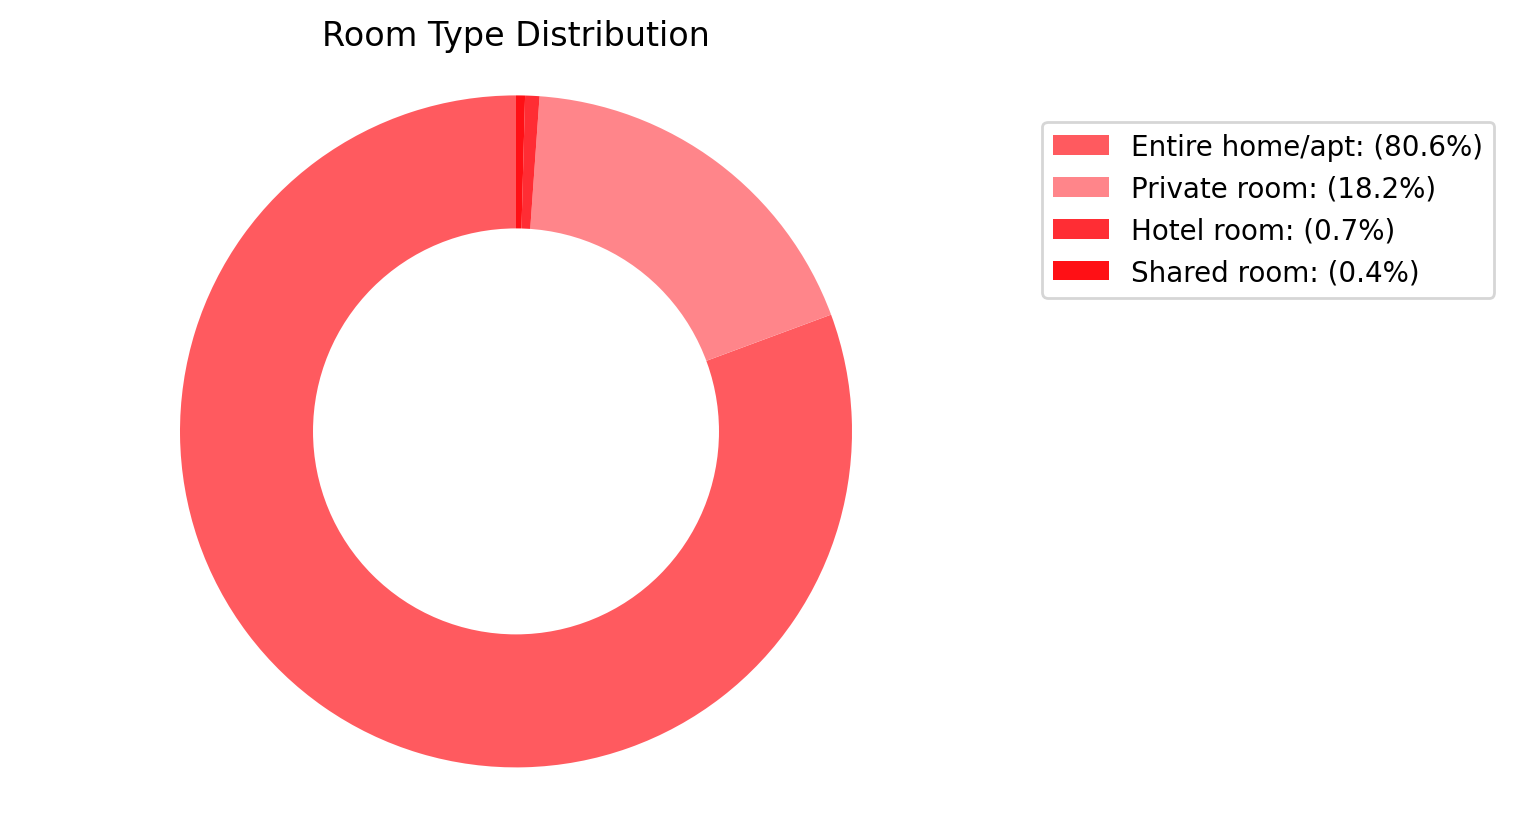

In [55]:
airbnb_color = '#FF5A5F'

shades = [
    airbnb_color,                                
    '#FF858A',  # Lighter shade
    '#FF2D34',  # Darker shade
    '#FF1015',  # Even darker shade
]

room_type_counts = df['room_type'].value_counts().sort_values(ascending=False)

# Data
labels = room_type_counts.index.tolist()
sizes = room_type_counts.values.tolist()

# Create a pie chart
plt.pie(sizes, labels=['']*len(labels), autopct='', startangle=90, colors=shades)

# Draw a circle at the center to create a donut chart
circle = plt.Circle((0, 0), 0.6, color='white')
plt.gca().add_artist(circle)

# Create custom legend with labels and percentages
plt.legend(labels=[f'{label}: ({size/sum(sizes)*100:.1f}%)' for label, size in zip(labels, sizes)], loc='center right', bbox_to_anchor=(1.5, 0.8))

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# Display the plot
plt.title('Room Type Distribution')
plt.show()
